# **FYP Cross Selling Association Rule Mining Testing**

**Import Module**

All the import module will be written below

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from collections import defaultdict
from itertools import combinations
import math

Read Order Item Data

In [5]:
order_item_data = pd.read_csv("Order Items Data.csv")
order_item_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
111019,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
111020,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
111021,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
111022,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_counts = order_item_data.groupby('order_id')['product_id'].count()
valid_orders = order_counts[order_counts >= 2].index
order_item_data_filtered = order_item_data[order_item_data['order_id'].isin(valid_orders)]
order_item_data_filtered = order_item_data_filtered.reset_index(drop=True)
order_item_data_filtered

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
1,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
2,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
3,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
4,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...
23418,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
23419,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
23420,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
23421,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


Prepare Common Data

In [7]:
transactions = order_item_data_filtered.groupby('order_id')['product_id'].apply(list).tolist()
print("Number of transactions:", len(transactions))
transactions

Number of transactions: 9654


[['368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'],
 ['e95ee6822b66ac6058e2e4aff656071a',
  'e95ee6822b66ac6058e2e4aff656071a',
  'e95ee6822b66ac6058e2e4aff656071a'],
 ['0b0172eb0fd18479d29c3bc122c058c2',
  '0b0172eb0fd18479d29c3bc122c058c2',
  '0b0172eb0fd18479d29c3bc122c058c2'],
 ['e67307ff0f15ade43fcb6e670be7a74c', 'e67307ff0f15ade43fcb6e670be7a74c'],
 ['2d9ff06c8870a518f5f6909774e140fb', '2d9ff06c8870a518f5f6909774e140fb'],
 ['d41dc2f2979f52d75d78714b378d4068', '880be32f4db1d9f6e2bec38fb6ac23ab'],
 ['2b939dc9b176d7fa21594d588815d4a4', '2b939dc9b176d7fa21594d588815d4a4'],
 ['1f9799a175f50c9fa725984775cac5c5', '13944d17b257432717fd260e69853140'],
 ['99e71b776debf2f01a69dce207e3e4f8', '99e71b776debf2f01a69dce207e3e4f8'],
 ['656e0eca68dcecf6a31b8ececfabe3e8', '656e0eca68dcecf6a31b8ececfabe3e8'],
 ['84f456958365164420cfc80fbe4c7fab', '84f456958365164420cfc80fbe4c7fab'],
 ['0c4a0f8ab44f9acd2d04e7024f9ba362',
  '0c4a0f8ab44f9acd2d04e7024f9ba362',
  '0c4a0f8ab44f9acd

In [8]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

**Apriori**

In [9]:
frequent_apriori = apriori(df_encoded, min_support=0.0005, use_colnames=True)
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=0.6)

print("Apriori rules:", rules_apriori.shape)
rules_apriori = rules_apriori[['antecedents','consequents','support','confidence','lift','leverage']]
rules_apriori

Apriori rules: (21, 14)


,antecedents,consequents,support,confidence,lift,leverage
0,(98d61056e0568ba048e5d78038790e77),(060cb19345d90064d1015407193c233d),0.000622,0.600000,827.485714,0.000621
1,(060cb19345d90064d1015407193c233d),(98d61056e0568ba048e5d78038790e77),0.000622,0.857143,827.485714,0.000621
2,(ee57070aa3b24a06fdd0e02efd2d757d),(0d85c435fd60b277ffb9e9b0f88f927a),0.000622,0.666667,495.076923,0.000620
3,(18486698933fbb64af6c0a255f7dd64c),(dbb67791e405873b259e4656bf971246),0.000725,0.875000,469.291667,0.000724
4,(35afc973633aaeb6b877ff57b2793310),(99a4788cb24856965c36a24e339b6058),0.003004,0.707317,97.549129,0.002973
5,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.003522,0.666667,114.928571,0.003491
6,(e53e557d5a159f5aa2c5e995dfdf244b),(36f60d45225e60c7da4558b070ce4b60),0.003522,0.607143,114.928571,0.003491
7,(3ce943997ff85cad84ec6770b35d6bcd),(b7d94dc0640c7025dc8e3b46b52d8239),0.000518,0.714286,861.964286,0.000517
8,(b7d94dc0640c7025dc8e3b46b52d8239),(3ce943997ff85cad84ec6770b35d6bcd),0.000518,0.625000,861.964286,0.000517
9,(4d0ec1e9b95fb62f9a1fbe21808bf3b1),(9ad75bd7267e5c724cb42c71ac56ca72),0.000622,0.666667,495.076923,0.000620


**FP-Growth**

In [10]:
frequent_fpg = fpgrowth(df_encoded, min_support=0.0005, use_colnames=True, max_len=2)
rules_fpg = association_rules(frequent_fpg, metric="confidence", min_threshold=0.6)

print("FP-Growth rules:", rules_fpg.shape)
rules_fpg = rules_fpg[['antecedents','consequents','support','confidence','lift','leverage']]
rules_fpg

FP-Growth rules: (21, 14)


,antecedents,consequents,support,confidence,lift,leverage
0,(98d61056e0568ba048e5d78038790e77),(060cb19345d90064d1015407193c233d),0.000622,0.600000,827.485714,0.000621
1,(060cb19345d90064d1015407193c233d),(98d61056e0568ba048e5d78038790e77),0.000622,0.857143,827.485714,0.000621
2,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.003522,0.666667,114.928571,0.003491
3,(e53e557d5a159f5aa2c5e995dfdf244b),(36f60d45225e60c7da4558b070ce4b60),0.003522,0.607143,114.928571,0.003491
4,(4fcb3d9a5f4871e8362dfedbdb02b064),(f4f67ccaece962d013a4e1d7dc3a61f7),0.001761,0.894737,479.877193,0.001757
5,(f4f67ccaece962d013a4e1d7dc3a61f7),(4fcb3d9a5f4871e8362dfedbdb02b064),0.001761,0.944444,479.877193,0.001757
6,(e6b314a2236c162ede1a879f1075430f),(ad4b5def91ac7c575dbdf65b5be311f4),0.000622,0.750000,804.500000,0.000621
7,(ad4b5def91ac7c575dbdf65b5be311f4),(e6b314a2236c162ede1a879f1075430f),0.000622,0.666667,804.500000,0.000621
8,(a50acd33ba7a8da8e9db65094fa990a4),(dfb97c88e066dc22165f31648efe1312),0.000518,0.625000,670.416667,0.000517
9,(e5ae72c62ebfa708624f5029d609b160),(5b8a5a9417210b1b84b67b9a7aefb935),0.000622,0.600000,965.400000,0.000621


**ECLAT**

Build Tidsets

In [35]:
tidsets = defaultdict(set)
for tid, trans in enumerate(transactions):
    for item in trans:
        tidsets[item].add(tid)
total_trans = len(transactions)
min_support = 0.0005  # Same as before
min_count = math.ceil(min_support * total_trans)

Filter frequent singletons

In [21]:
frequent_single = [item for item, tids in tidsets.items() if len(tids) >= min_count]

Sort by support ascending for efficiency

In [23]:
frequent_single.sort(key=lambda item: len(tidsets[item]))

Prepare initial tidsets dict for frequent items

In [26]:
initial_tidsets = {item: tidsets[item] for item in frequent_single}

ECLAT recursive function

In [28]:
def eclat(prefix, items, min_count, tidsets_local, freq_itemsets):
    for i in range(len(items)):
        item = items[i]
        new_prefix = prefix + [item]
        itemset_support = len(tidsets_local[item]) / total_trans
        freq_itemsets.append({'support': itemset_support, 'itemsets': frozenset(new_prefix)})

        new_tidsets = {}
        for j in range(i + 1, len(items)):
            next_item = items[j]
            inter = tidsets_local[item] & tidsets_local[next_item]
            if len(inter) >= min_count:
                new_tidsets[next_item] = inter

        if new_tidsets:
            eclat(new_prefix, list(new_tidsets.keys()), min_count, new_tidsets, freq_itemsets)

Run ECLAT

In [29]:
freq_itemsets = []
eclat([], frequent_single, min_count, initial_tidsets, freq_itemsets)

Convert to DataFrame like mlxtend

In [30]:
frequent_eclat = pd.DataFrame(freq_itemsets)
print("ECLAT frequent itemsets:", frequent_eclat.shape)
frequent_eclat

ECLAT frequent itemsets: (364, 2)


,support,itemsets
0,0.000518,(8338cef8355d238f43711dcb9c0657b2)
1,0.000518,(d6fe3b4ddecd4a8393c6a1385de3bfb6)
2,0.000518,(5b226d7c52f86ac72457617f78cff95d)
3,0.000518,(1a300f482e35d7eac74b229be067aefd)
4,0.000518,(09c3a2ea33f044aebffecd6681e00133)
...,...,...
359,0.000932,"(53759a2ecddad2bb87a079a1f1519f73, 389d119b48c..."
360,0.001139,"(422879e10f46682990de24d770e7f83d, 389d119b48c..."
361,0.009115,(53759a2ecddad2bb87a079a1f1519f73)
362,0.000725,"(53759a2ecddad2bb87a079a1f1519f73, 422879e10f4..."


Generate rules (using mlxtend's association_rules)

In [31]:
rules_eclat = association_rules(frequent_eclat, metric="confidence", min_threshold=0.6)

print("ECLAT rules:", rules_eclat.shape)
rules_eclat = rules_eclat[['antecedents','consequents','support','confidence','lift','leverage']]
rules_eclat

ECLAT rules: (21, 14)


,antecedents,consequents,support,confidence,lift,leverage
0,(e5ae72c62ebfa708624f5029d609b160),(5b8a5a9417210b1b84b67b9a7aefb935),0.000622,0.600000,965.400000,0.000621
1,(5b8a5a9417210b1b84b67b9a7aefb935),(e5ae72c62ebfa708624f5029d609b160),0.000622,1.000000,965.400000,0.000621
2,(98d61056e0568ba048e5d78038790e77),(060cb19345d90064d1015407193c233d),0.000622,0.600000,827.485714,0.000621
3,(060cb19345d90064d1015407193c233d),(98d61056e0568ba048e5d78038790e77),0.000622,0.857143,827.485714,0.000621
4,(3ce943997ff85cad84ec6770b35d6bcd),(b7d94dc0640c7025dc8e3b46b52d8239),0.000518,0.714286,861.964286,0.000517
5,(b7d94dc0640c7025dc8e3b46b52d8239),(3ce943997ff85cad84ec6770b35d6bcd),0.000518,0.625000,861.964286,0.000517
6,(5d790355cbeded0cd60e25cbc4c527a2),(5fc3e6a4b52b0c414458104ed4037f1c),0.000622,0.857143,1182.122449,0.000621
7,(5fc3e6a4b52b0c414458104ed4037f1c),(5d790355cbeded0cd60e25cbc4c527a2),0.000622,0.857143,1182.122449,0.000621
8,(e6b314a2236c162ede1a879f1075430f),(ad4b5def91ac7c575dbdf65b5be311f4),0.000622,0.750000,804.500000,0.000621
9,(ad4b5def91ac7c575dbdf65b5be311f4),(e6b314a2236c162ede1a879f1075430f),0.000622,0.666667,804.500000,0.000621


+-------------+---------------+------------------+------------+----------------+
| Algorithm   |   Avg Support |   Avg Confidence |   Avg Lift |   Avg Leverage |
+=============+===============+==================+============+================+
| Apriori     |    0.00110983 |         0.735604 |    666.056 |     0.00110446 |
+-------------+---------------+------------------+------------+----------------+
| FP-Growth   |    0.00110983 |         0.735604 |    666.056 |     0.00110446 |
+-------------+---------------+------------------+------------+----------------+
| ECLAT       |    0.00110983 |         0.735604 |    666.056 |     0.00110446 |
+-------------+---------------+------------------+------------+----------------+


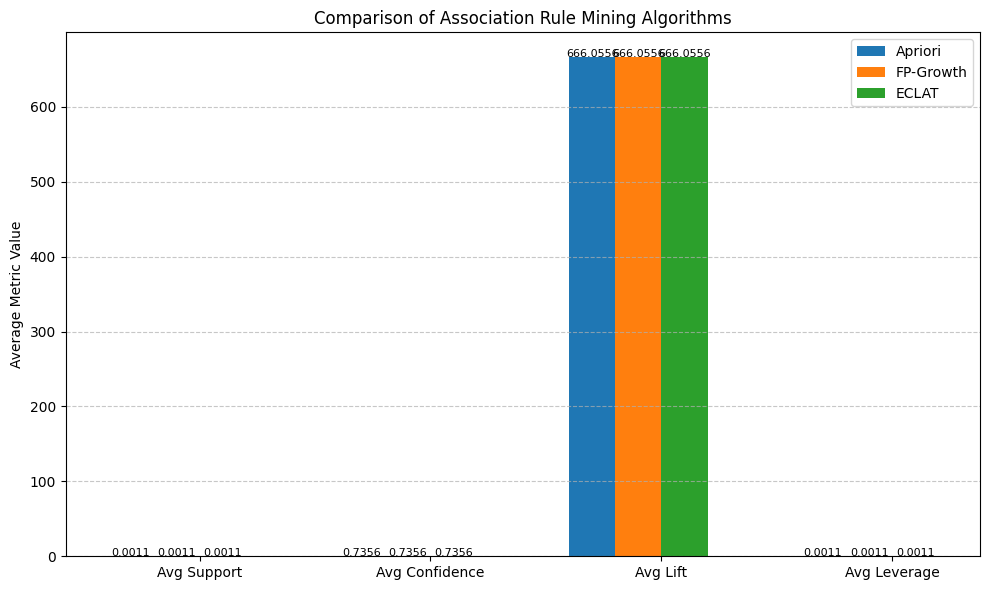

In [32]:
comparison = pd.DataFrame({
    'Algorithm': ['Apriori', 'FP-Growth', 'ECLAT'],
    'Avg Support': [
        rules_apriori['support'].mean(),
        rules_fpg['support'].mean(),
        rules_eclat['support'].mean(),
    ],
    'Avg Confidence': [
        rules_apriori['confidence'].mean(),
        rules_fpg['confidence'].mean(),
        rules_eclat['confidence'].mean(),
    ],
    'Avg Lift': [
        rules_apriori['lift'].mean(),
        rules_fpg['lift'].mean(),
        rules_eclat['lift'].mean(),
    ],
    'Avg Leverage': [
        rules_apriori['leverage'].mean(),
        rules_fpg['leverage'].mean(),
        rules_eclat['leverage'].mean(),
    ]
})

# Display table using tabulate
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# ---- Visualization ----
metrics = ['Avg Support', 'Avg Confidence', 'Avg Lift', 'Avg Leverage']
x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, comparison.iloc[0, 1:], width, label='Apriori')
plt.bar(x - 0.5*width, comparison.iloc[1, 1:], width, label='FP-Growth')
plt.bar(x + 0.5*width, comparison.iloc[2, 1:], width, label='ECLAT')

plt.xticks(x, metrics)
plt.title("Comparison of Association Rule Mining Algorithms")
plt.ylabel("Average Metric Value")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for i in range(len(comparison)):
    for j, val in enumerate(comparison.iloc[i, 1:]):
        plt.text(j + (i-1.5)*width, val + 0.0001, f"{val:.4f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()